<a href="https://colab.research.google.com/github/Tamerstito/vhs-intro-ai/blob/main/road_network_analysis_1_1_A*.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a Road Network Graph Using `osmnx`
In this coding challenge, we are going to work with road network data from [OpenStreetMap](https://www.openstreetmap.org/#map=4/38.01/-95.84) using the [osmnx](https://osmnx.readthedocs.io/en/stable/index.html) python package.

*You need to answer ALL question prompts in this notebook. Question prompts are all italicized.*



### 1. Install the `osmnx` Library

Before you begin, ensure that the `osmnx` library is installed. You can do this by running the following command:




```
!pip install osmnx
```



In [1]:
# ADD CODE HERE
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4
    Uninstalling networkx-3.4:
      Successfully uninstalled networkx-3.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


### 2. Import the Required Libraries
Next, you will need to import the necessary libraries in your Python code, and check the version.

In [24]:
import osmnx as ox
import numpy as np
import heapq
import math
ox.__version__

'1.9.4'

### 3. Generate the Graph for a Specific Location

Now, you will generate a road network graph from a specific address.

In this example, we will use the school address: "13051 Whittington Drive, Houston, TX" and generate a graph of roads within a 5,000-meter radius (5 km). We will use the `ox.graph.graph_from_address()` method. (See documentation: https://osmnx.readthedocs.io/en/stable/user-reference.html)

* `address`: This is the starting location around which the graph will be generated. You can replace this address with any other address.
* `dist`: This specifies the radius (in meters) around the address for which the network will be created. In this case, the radius is 5,000 meters (or 5 km).
* `network_type`: This specifies the type of network you want to extract. Options include:
  * "drive": For driving (car) routes.
  * "walk": For pedestrian routes.
  * "bike": For cycling routes.
  * "all": For all types of routes.

In [3]:
# Add code in the blanks
G = ox.graph_from_address(address="13051 Whittington Drive, Houston, TX", dist=5000, network_type="all")

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


### 4. Visualize the graph
We will use the `ox.project_graph()` and `ox.plot_graph()` methods to visualize the graph.

*4.1 Modify the `node_size` parameter. How does it change the visualisation?* -
It increases the size of the road intersection or endings.

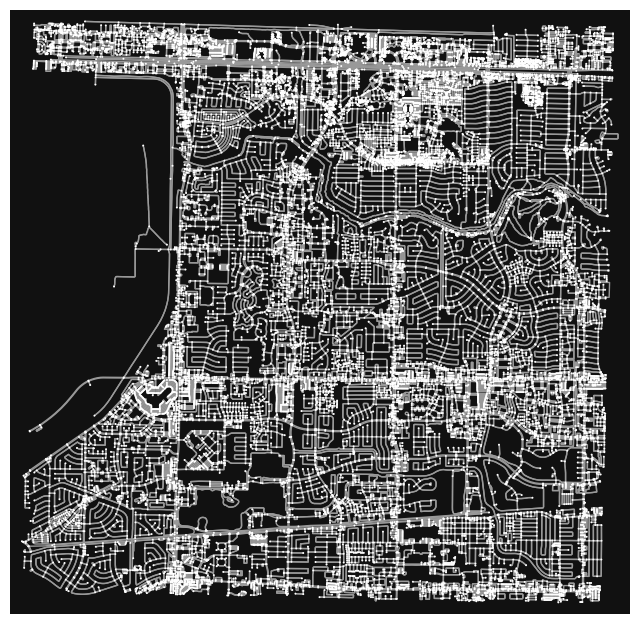

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
Gp = ox.project_graph(G)
ox.plot_graph(Gp, node_size=2)

### 5. Analyze the graph

*5.1 How many nodes are in the graph? [Use: `G.nodes()`]* -
23447

In [5]:
nodes_list = list(G.nodes())
print(len(nodes_list))

23497


*5.2 How many edges are in the graph? [Use: `G.edges`]* -
59793

In [6]:
# ADD CODE HERE
edges_list = list(G.edges())
print(len(edges_list))

59918


*5.3 What information does the node store? Run the code below to get the information for the first node in the graph.* -
The coordinates of the node, and the edges coming off of it.

In [7]:
current_node = nodes_list[0]
print(f"Node {current_node}: {G.nodes[current_node]}")

Node 151365266: {'y': 29.749123, 'x': -95.5721842, 'street_count': 4}


*5.4 What information does the edge store? Is the edge weight part of this information?* -
The name of the road, if its one way, the amount of lanes, type of road, and the length of the road

In [8]:
# ADD CODE HERE
current_edge = edges_list[0]
print(f"Edge {current_edge}: {G.get_edge_data(current_edge[0],current_edge[1])}")

Edge (151365266, 8292157400): {0: {'osmid': 422675002, 'oneway': True, 'lanes': '2', 'name': 'Wilcrest Drive', 'highway': 'secondary', 'reversed': False, 'length': 17.28}}


*5.5 Create a new graph, `G_walk` by specifying `network_type` to "walk". Visualize it and compare it with the road network. How many nodes and edges does `G_walk` contain?* -
There are quite a few sections which are blank as compared to the "all" map. There were 20109 nodes, and 57406 edges

In [9]:
# # ADD CODE HERE
# G_walk = ox.graph_from_address(address="13051 Whittington Drive, Houston, TX", dist=5000, network_type="walk")
# Gp_walk = ox.project_graph(G_walk)
# ox.plot_graph(Gp_walk, node_size=2)

# nodes_list = list(G_walk.nodes())
# print(len(nodes_list))
# edges_list = list(G_walk.edges())
# print(len(edges_list))

# Shortest Path using `osmnx`

To find the shortest path, we will use the `shortest_path` method.

### 6. Setup Origin and Destination Nodes
But first, we need to specify the origin and destination using the latitude and longitude values for the location.



 Use google maps, to find the lat-long values of:
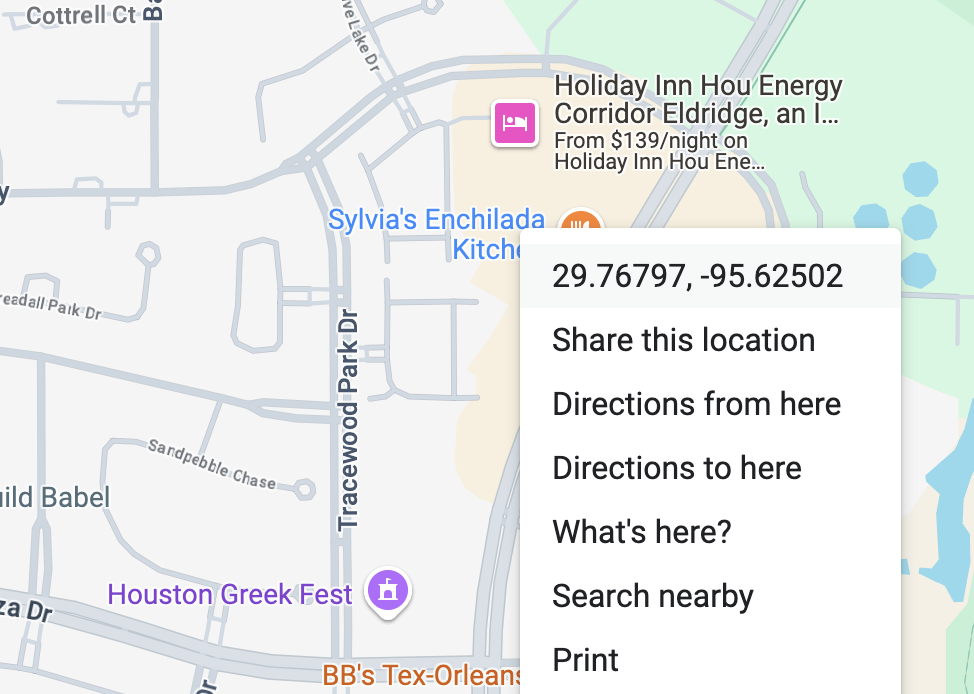
* origin - Village High School
* destination -  Sylvia's Enchilada Kitchen

*6.1 Specify the latitude & longitude as tuple.*

In [10]:
origin = (-95.61936909108938, 29.746238791419245) # Point A
destination = (-95.6243848867286, 29.767694967003223) # Point B

*6.2 Next use the `nearest_nodes()` method to get the node in the graph that is nearest to the specified location. Note that `x` is longitude and `y` is latitude.*

In [11]:
origin_node = ox.distance.nearest_nodes(G, X=origin[0], Y=origin[1])
destination_node = ox.distance.nearest_nodes(G, X=destination[0], Y=destination[1])

### 7. Find shortest path using `osmnx` `shortest_path()` method
Now we are ready to find the shortest path between the origin and destination using the shortest_path method.

In [12]:
route = ox.shortest_path(G, origin_node, destination_node)

Visualise the shortest path using `plot_graph_route()` method.

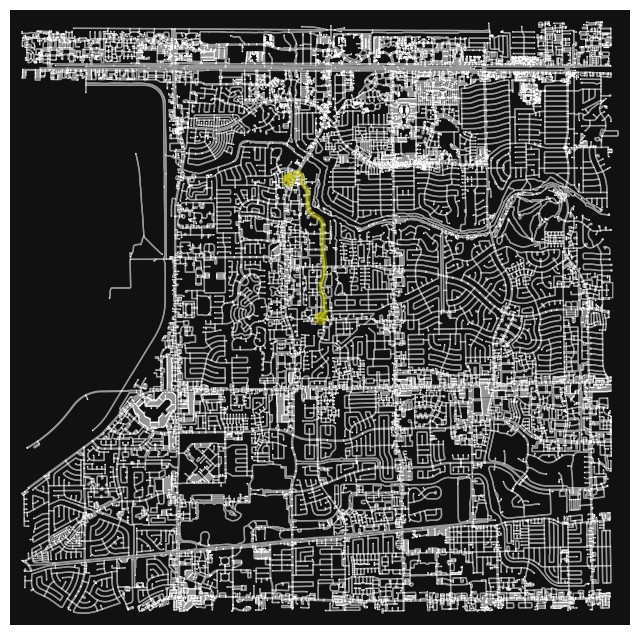

In [13]:
fig, ax = ox.plot_graph_route(G, route, route_color="y", node_size=1)

# Shortest Path using your Dijkstra's method



*8.1 Use the `GraphL` class that you have already created in a previous lesson in this notebook. Note that `GraphL` class should have dijkstra_shortest_path() as a method.*

In [15]:
class GraphL:
  def __init__(self, num_vertices, directed = False):
    self.directed = directed
    self.adjacency_list = {}
    for i in range(num_vertices):
        self.adjacency_list[i] = []

  def add_edge(self, vertex1, vertex2, weight=1):
    if(not self.has_edge(vertex1, vertex2)):
      self.adjacency_list[vertex1].append(tuple((vertex2, weight)))
      if(not self.directed):
        self.adjacency_list[vertex2].append(tuple((vertex1, weight)))

  def remove_edge(self, vertex1, vertex2):
    if(self.has_edge(vertex1, vertex2)):
      self.adjacency_list[vertex1] = [tup for tup in self.adjacency_list[vertex1] if tup[0] != vertex2]
      if(not self.directed):
        self.adjacency_list[vertex2] = [tup for tup in self.adjacency_list[vertex2] if tup[0] != vertex1]

  def has_edge(self, vertex1, vertex2):
    for tup in self.adjacency_list[vertex1]:
      if(tup[0] == vertex2):
        return True
    return False

  def get_neighbors(self, vertex):
    if(len(self.adjacency_list[vertex]) > 0):
      for tup in self.adjacency_list[vertex]:
        print("Vertex " + str(tup[0]) + " is a neighbor of vertex " + str(vertex))
    else:
      print(str(vertex) + " has no neighbors")

  def add_vertex(self):
    self.adjacency_list[len(self.adjacency_list)] = []

  def display(self):
    for vertex in self.adjacency_list:
      print(f"Vertex: {vertex}")
      for connections in self.adjacency_list[vertex]:
        print(f"Has an edge with vertex {connections[0]} of weight {connections[1]}")

  def BFS(self, start, goal):
    explored = []
    queue = [[start]]
    found = False

    while(queue and not found):
      path = queue.pop(0)
      node = path[-1]

      if node not in explored:
        neighbours = list(self.adjacency_list[node])
        for neighbour in neighbours:
          new_path = list(path)
          new_path.append(neighbour[0])
          if new_path[-1] not in explored:
            queue.append(new_path)
            if neighbour[0] == goal:
              print("Shortest path = ", *new_path)
              found = True
      explored.append(node)

    if not found:
      print("No path found")

  import heapq

  def dijkstra(graph, start_vertex):
    distances = {vertex: float('inf') for vertex in graph.adjacency_list}
    distances[start_vertex] = 0
    priority_queue = [(0, start_vertex)]
    previous_vertices = {vertex: None for vertex in graph.adjacency_list}

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        if current_distance > distances[current_vertex]:
            continue
        for neighbor, weight in graph.adjacency_list[current_vertex]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_vertices[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))
    return distances, previous_vertices


  def get_shortest_path(self, previous_vertices, start_vertex, end_vertex):
    path = []
    current_vertex = end_vertex

    while current_vertex is not None:
        path.append(current_vertex)
        current_vertex = previous_vertices[current_vertex]

    path = path[::-1]
    if path[0] == start_vertex:
        return path
    else:
        return []


*8.2 Now we will copy the nodes from the `osmnx` graph to our adjacency list graph representation.*

In [17]:
myG = GraphL(0, directed=True)
gMap = {}
node_count = 0


In [18]:
for node in G.nodes():
  gMap[node] = node_count
  myG.add_vertex()
  node_count += 1 # add node using your add_node() method
for node in G.nodes():
  for neighbor, data in G[node].items():
    for edge_data in data.values():
      weight = edge_data.get('length', 1)  # Assuming 'length' is the edge attribute
      myG.add_edge(gMap[node], gMap[neighbor], weight)# add edge using your add_edge() method

*8.3 Display the graph using the display() method in the `GraphL` class.*

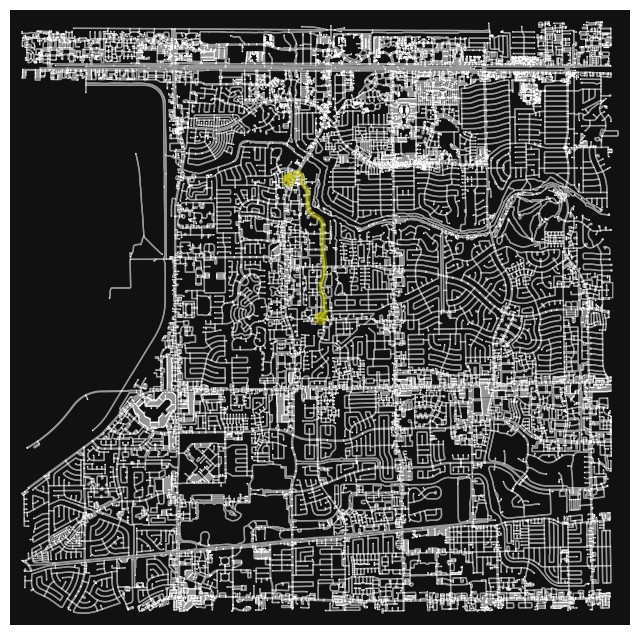

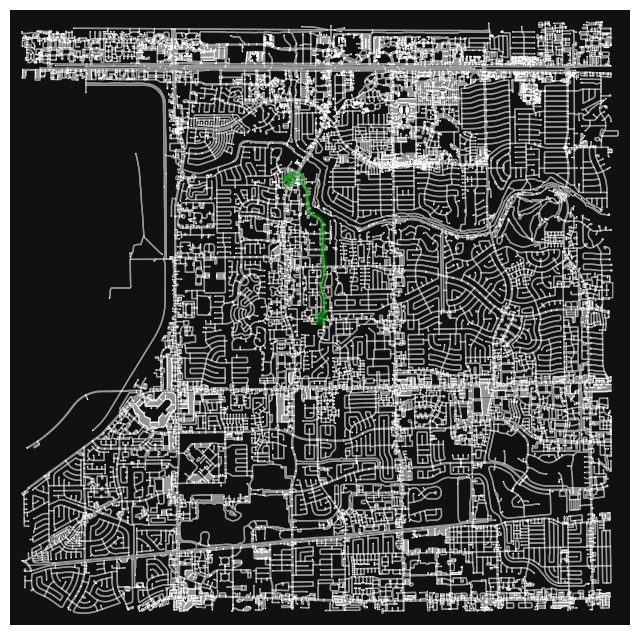

In [19]:
# ADD CODE HERE
distances, previous_vertices = GraphL.dijkstra(myG, gMap[origin_node])
myPath = myG.get_shortest_path(previous_vertices, gMap[origin_node], gMap[destination_node])
inv_map = {v: k for k, v in gMap.items()}
myPathAdapted = [inv_map.get(node, node) for node in myPath]
fig, ax = ox.plot_graph_route(G, route, route_color="y", node_size=1)
fig, ax = ox.plot_graph_route(G, myPathAdapted, route_color="g", node_size=1)

* Get the shortest path by calling `dijkstra_shortest_path()` method with the newly created `myG` graph.

* Plot the path and compare it with the output of the `shortest_path()` from the `osmnx` package.

*8.4 Compare the results.Does your implementation give the same route as that of the `osmnx` package?*
I ended up getting the exact same path between my version and the new one.

In [20]:
# ADD CODE HERE

# Your Turn
*9. Modify the graph to include a 20 km radius around an address of your choice. Choose at least 2 (origin, destination) pairs and compute shortest path using your Dijkstra's method. Visualize the results.*

In [21]:
# # Create the map
# G = ox.graph_from_address(address="5403 Summer Snow Drive, TX", dist=20000, network_type="all")

In [22]:
# # Get the closest nodes to the coordinates
# origin = (-95.61071105162071, 29.84572615463322) # Point A
# destination = (-95.37840163771142, 30.026575662136967) # Point B
# origin_node = ox.distance.nearest_nodes(G, X=origin[0], Y=origin[1])
# destination_node = ox.distance.nearest_nodes(G, X=destination[0], Y=destination[1])
# # Initialise adjacency list
# myG = GraphL(0, directed=True)
# gMap = {} # Dictionary to translate the osx nodes to my adjacency list nodes
# node_count = 0
# for node in G.nodes(): # Initialise all the edges and nodes into my adjacency list
#   gMap[node] = node_count
#   myG.add_vertex()
#   node_count += 1 # add node using your add_node() method
# for node in G.nodes():
#   for neighbor, data in G[node].items():
#     for edge_data in data.values():
#       weight = edge_data.get('length', 1)
#       myG.add_edge(gMap[node], gMap[neighbor], weight)
# # Apply dijkstras to the map
# distances, previous_vertices = GraphL.dijkstra(myG, gMap[origin_node])
# myPath = myG.get_shortest_path(previous_vertices, gMap[origin_node], gMap[destination_node])
# # Inverse the dictionary to convert back in order to map
# inv_map = {v: k for k, v in gMap.items()}
# myPathAdapted = [inv_map.get(node, node) for node in myPath]
# fig, ax = ox.plot_graph_route(G, myPathAdapted, route_color="g", node_size=1)

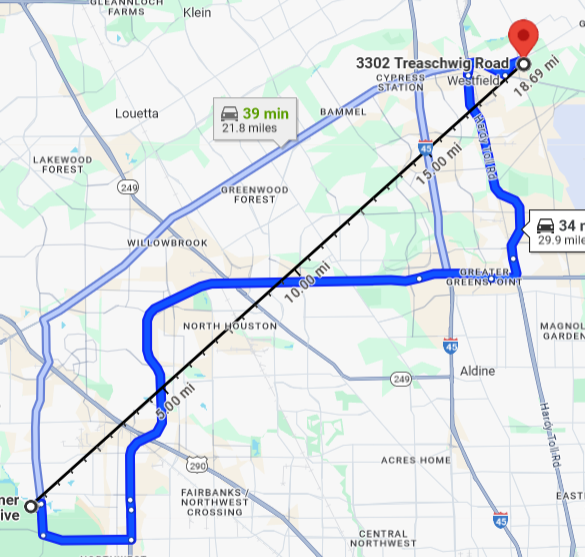

In [27]:
class AGraphL:
    def __init__(self, num_vertices, directed=False):
        self.directed = directed
        self.adjacency_list = {}
        self.node_attributes = {}  # Dictionary to store node attributes (latitude and longitude)
        for i in range(num_vertices):
            self.adjacency_list[i] = []
            self.node_attributes[i] = {'lat': None, 'lon': None}

    def add_edge(self, vertex1, vertex2, weight=1):
        if not self.has_edge(vertex1, vertex2):
            self.adjacency_list[vertex1].append((vertex2, weight))
            if not self.directed:
                self.adjacency_list[vertex2].append((vertex1, weight))

    def remove_edge(self, vertex1, vertex2):
        if self.has_edge(vertex1, vertex2):
            self.adjacency_list[vertex1] = [tup for tup in self.adjacency_list[vertex1] if tup[0] != vertex2]
            if not self.directed:
                self.adjacency_list[vertex2] = [tup for tup in self.adjacency_list[vertex2] if tup[0] != vertex1]

    def has_edge(self, vertex1, vertex2):
        return any(tup[0] == vertex2 for tup in self.adjacency_list[vertex1])

    def get_neighbors(self, vertex):
        if self.adjacency_list[vertex]:
            for tup in self.adjacency_list[vertex]:
                print(f"Vertex {tup[0]} is a neighbor of vertex {vertex}")
        else:
            print(f"{vertex} has no neighbors")

    def add_vertex(self):
        self.adjacency_list[len(self.adjacency_list)] = []
        self.node_attributes[len(self.node_attributes)] = {'lat': None, 'lon': None}

    def display(self):
        for vertex in self.adjacency_list:
            print(f"Vertex: {vertex}")
            for connections in self.adjacency_list[vertex]:
                print(f"Has an edge with vertex {connections[0]} of weight {connections[1]}")

    def dijkstra(self, start_vertex):
        distances = {vertex: float('inf') for vertex in self.adjacency_list}
        distances[start_vertex] = 0
        priority_queue = [(0, start_vertex)]
        previous_vertices = {vertex: None for vertex in self.adjacency_list}

        while priority_queue:
            current_distance, current_vertex = heapq.heappop(priority_queue)
            if current_distance > distances[current_vertex]:
                continue
            for neighbor, weight in self.adjacency_list[current_vertex]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous_vertices[neighbor] = current_vertex
                    heapq.heappush(priority_queue, (distance, neighbor))
        return distances, previous_vertices

    def get_shortest_path(self, previous_vertices, start_vertex, end_vertex):
        path = []
        current_vertex = end_vertex

        while current_vertex is not None:
            path.append(current_vertex)
            current_vertex = previous_vertices[current_vertex]

        path = path[::-1]
        if path[0] == start_vertex:
            return path
        else:
            return []

    def set_node_attributes(self, G):
        for node in self.adjacency_list:
            if inv_map[node] in G.nodes:
                self.node_attributes[node]['lat'] = G.nodes[inv_map[node]]['y']
                self.node_attributes[node]['lon'] = G.nodes[inv_map[node]]['x']

    def haversine_distance(node1_attrs, node2_attrs):
      lat1 = node1_attrs['lat']
      lon1 = node1_attrs['lon']
      lat2 = node2_attrs['lat']
      lon2 = node2_attrs['lon']

      # Convert latitude and longitude from degrees to radians
      phi1 = math.radians(lat1)
      phi2 = math.radians(lat2)
      delta_phi = math.radians(lat2 - lat1)
      delta_lambda = math.radians(lon2 - lon1)

      # Haversine formula
      a = math.sin(delta_phi / 2.0)**2 + \
          math.cos(phi1) * math.cos(phi2) * \
          math.sin(delta_lambda / 2.0)**2
      c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

      # Earth's radius in meters
      R = 6371000

      # Distance in meters
      distance = R * c

      return distance